In [6]:
# Import Libraries

In [11]:
import warnings

import numpy as np
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import sklearn
import re
import nltk
import string
from nltk.text import Text
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('bmh')

In [3]:
# Import Dataset

In [13]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [14]:
# Data Information
# Numbers of observations and features
# Features of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [15]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 11162
Number of Features: 17


In [40]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [18]:
#From these informations we can already see that some features won't be relevant in our exploratory analysis 

In [19]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['poutcome']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: poutcome, 



In [41]:
# Type of Data

In [20]:
df.dtypes


job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object

In [23]:
#Now lets take a look at how the balance is distributed

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64


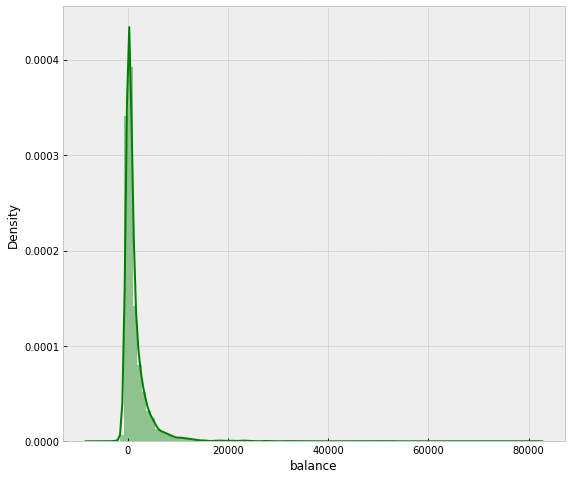

In [22]:
print(df['balance'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['balance'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [5]:
#2.1: Text Cleaning

<AxesSubplot:>

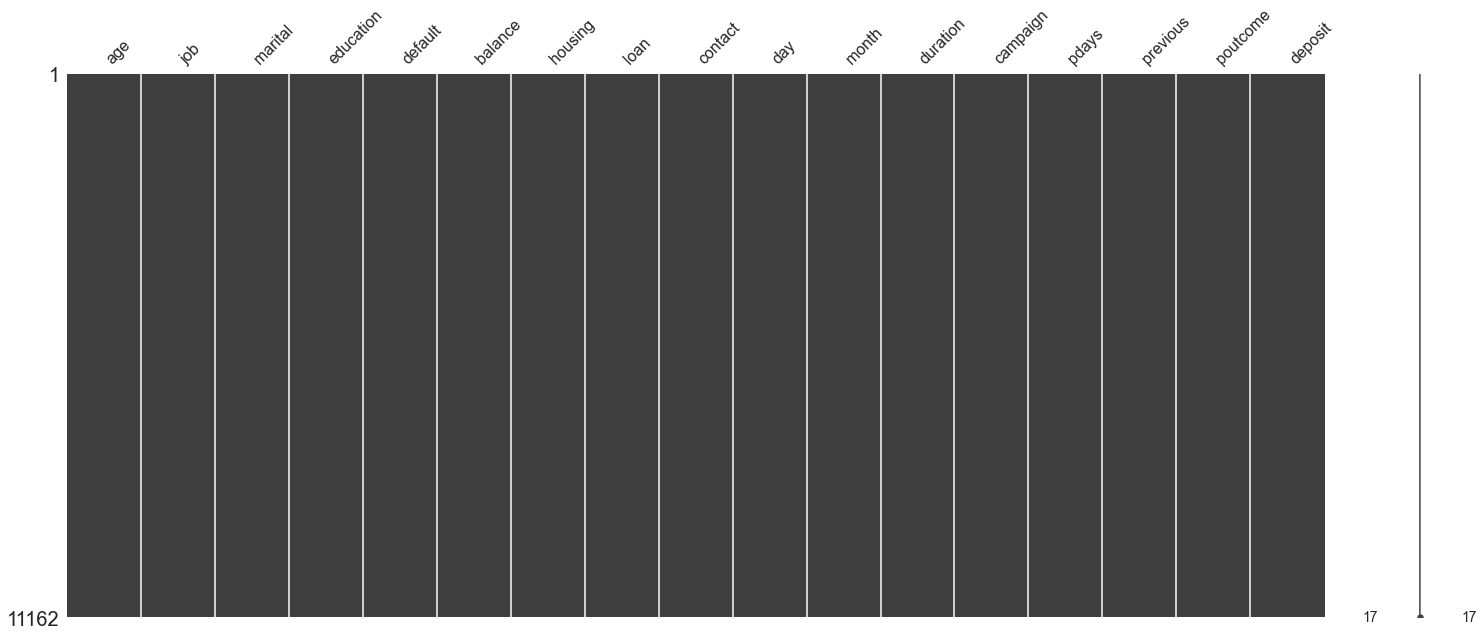

In [43]:
msno.matrix(df)

In [24]:
#Numerical data distribution
#For this part lets look at the distribution of all of the features by ploting them

#To do so lets first list all the types of our data from our dataset and take only the numerical ones:

list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [25]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,balance,day,duration,campaign,pdays,previous
0,2343,5,1042,1,-1,0
1,45,5,1467,1,-1,0
2,1270,5,1389,1,-1,0
3,2476,5,579,1,-1,0
4,184,5,673,2,-1,0


In [5]:
df.drop("age", axis=1)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [30]:
#Now lets plot them all:

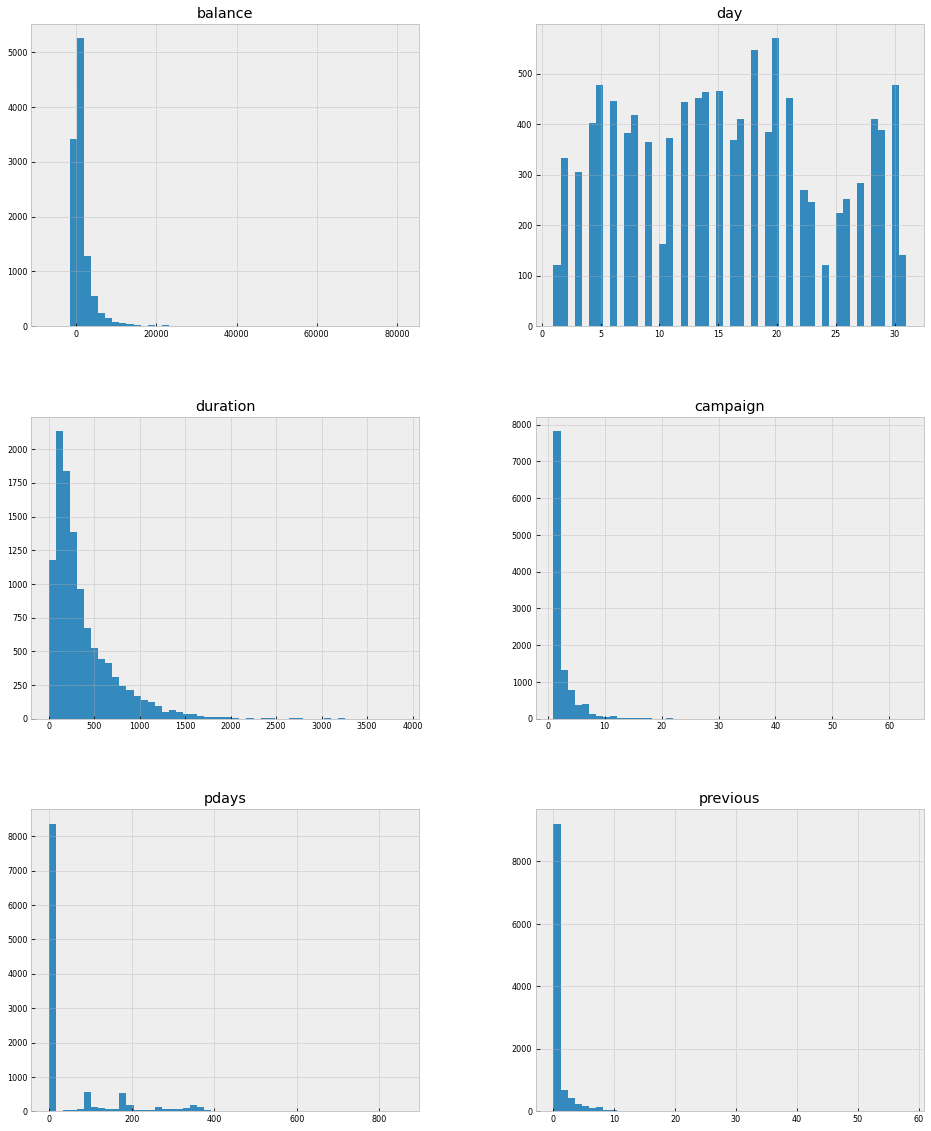

In [29]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
#Correlation
#Now we'll try to find which features are strongly correlated with balance.

In [35]:
df_num_corr = df_num.corr()['balance'][:-1] # -1 because the latest row is balance
golden_features_list = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with balance:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with balance:
balance     1.000000
duration    0.022436
pdays       0.017411
day         0.010467
campaign   -0.013894
Name: balance, dtype: float64


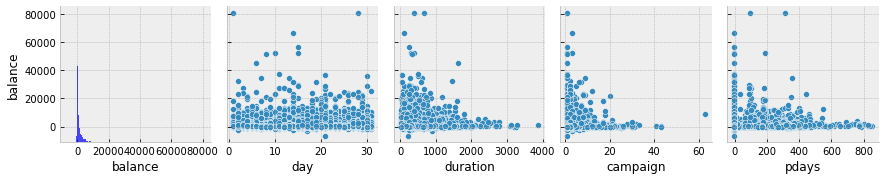

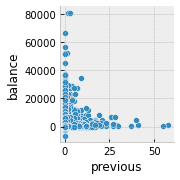

In [36]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['balance'])